# संभावना और सांख्यिकी का परिचय
इस नोटबुक में, हम उन कुछ अवधारणाओं के साथ प्रयोग करेंगे जिन पर हमने पहले चर्चा की है। संभावना और सांख्यिकी से जुड़ी कई अवधारणाएं Python में डेटा प्रोसेसिंग के लिए प्रमुख लाइब्रेरीज़, जैसे `numpy` और `pandas`, में अच्छी तरह से प्रस्तुत की गई हैं।


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## रैंडम वेरिएबल्स और डिस्ट्रीब्यूशन्स  
आइए 0 से 9 के बीच की एक समान डिस्ट्रीब्यूशन से 30 मानों का एक सैंपल निकालते हैं। साथ ही, हम इसका औसत (mean) और वैरिएंस (variance) भी निकालेंगे।  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


नमूने में कितने विभिन्न मान हैं, इसका दृष्टिगत अनुमान लगाने के लिए, हम **हिस्टोग्राम** बना सकते हैं:


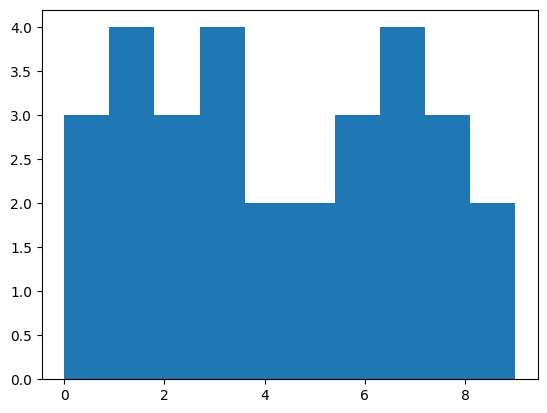

In [119]:
plt.hist(sample)
plt.show()

## वास्तविक डेटा का विश्लेषण करना

औसत और विचरण वास्तविक दुनिया के डेटा का विश्लेषण करते समय बहुत महत्वपूर्ण होते हैं। आइए बेसबॉल खिलाड़ियों के बारे में डेटा [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) से लोड करें।


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


हम यहाँ डेटा विश्लेषण के लिए [**Pandas**](https://pandas.pydata.org/) नामक पैकेज का उपयोग कर रहे हैं। इस कोर्स में आगे हम Pandas और Python में डेटा के साथ काम करने के बारे में और अधिक चर्चा करेंगे।

आइए उम्र, ऊंचाई और वजन के औसत मानों की गणना करें:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

अब आइए ऊंचाई पर ध्यान केंद्रित करें, और मानक विचलन और विचरण की गणना करें:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


औसत के अलावा, माध्यिका मान और चतुर्थक देखना भी समझदारी है। इन्हें एक **बॉक्स प्लॉट** का उपयोग करके दर्शाया जा सकता है:


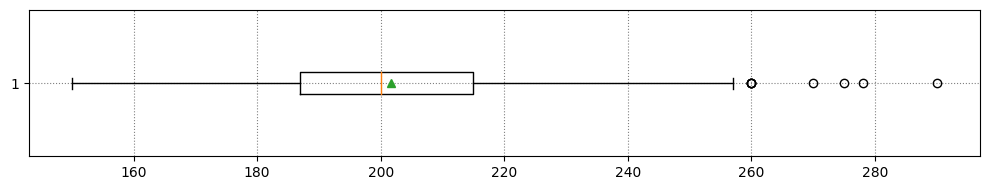

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

हम हमारे डेटा सेट के उपसमुच्चयों के बॉक्स प्लॉट भी बना सकते हैं, उदाहरण के लिए, खिलाड़ी की भूमिका के अनुसार समूहित।


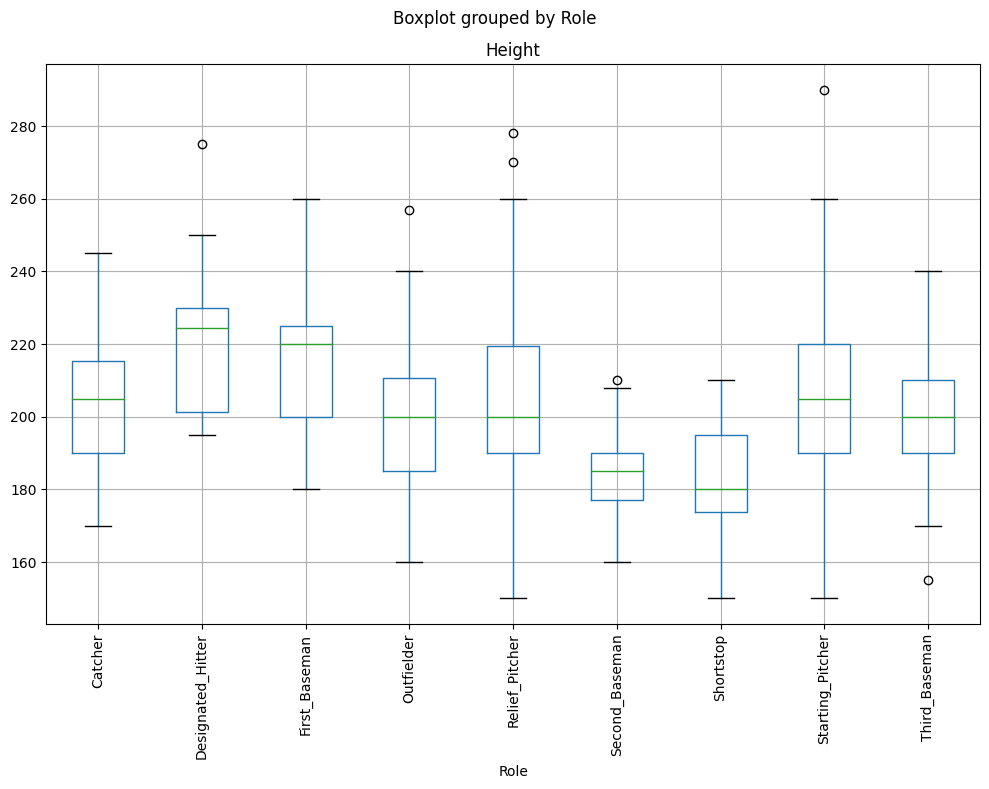

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **नोट**: यह आरेख सुझाव देता है कि औसतन, पहले बेसमैन की ऊंचाई दूसरे बेसमैन की ऊंचाई से अधिक होती है। बाद में हम सीखेंगे कि इस परिकल्पना को अधिक औपचारिक रूप से कैसे परीक्षण किया जा सकता है, और यह दिखाने के लिए कि हमारे डेटा सांख्यिकीय रूप से महत्वपूर्ण है।  

आयु, ऊंचाई और वजन सभी सतत यादृच्छिक चर हैं। आपको क्या लगता है कि उनका वितरण कैसा है? इसका पता लगाने का एक अच्छा तरीका है कि मानों का हिस्टोग्राम बनाएं:


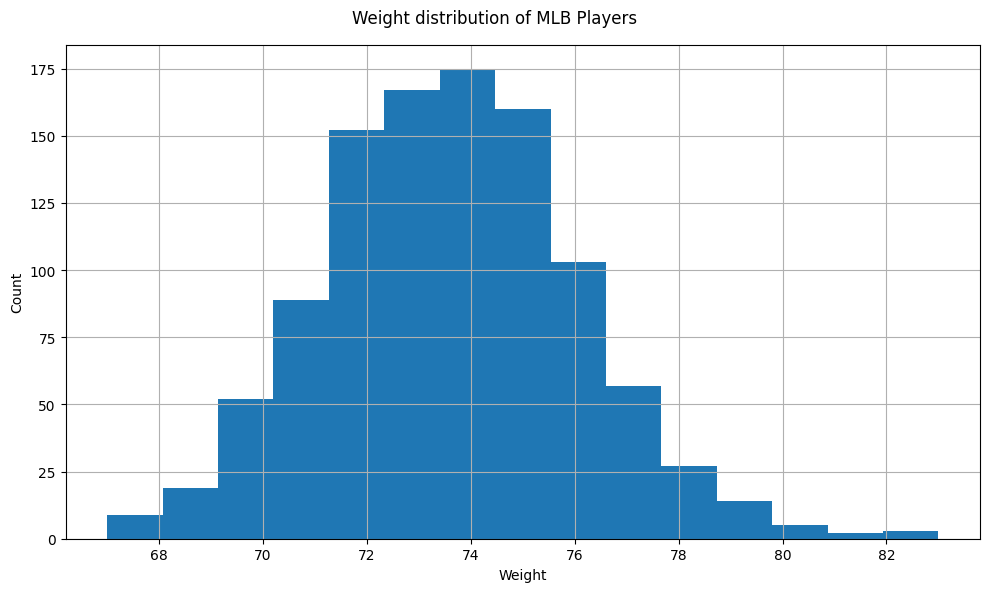

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## सामान्य वितरण

आइए एक कृत्रिम नमूना बनाते हैं जो भारों का अनुसरण करता है और हमारे वास्तविक डेटा के समान औसत और विचरण रखता है:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

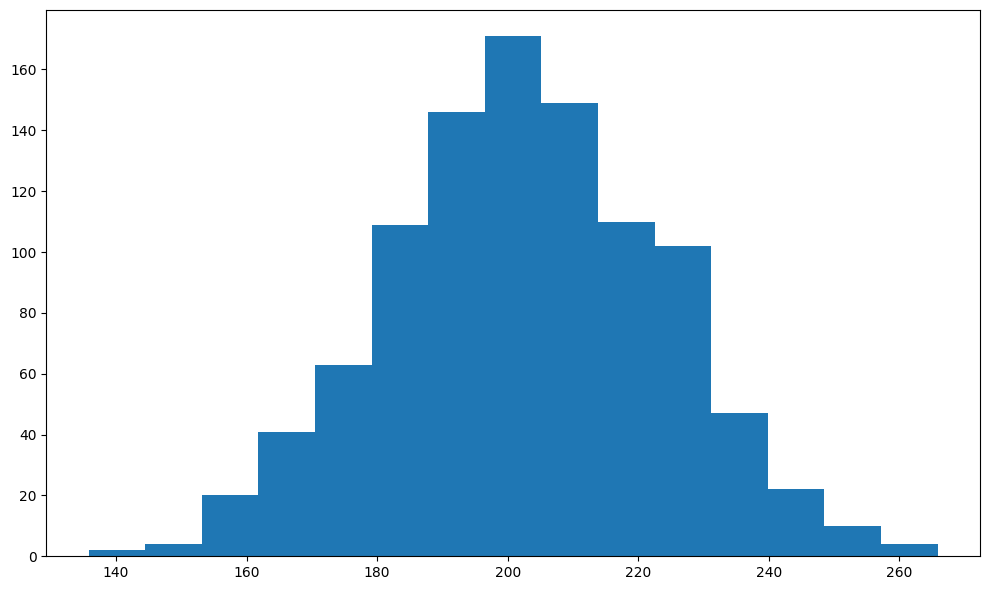

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

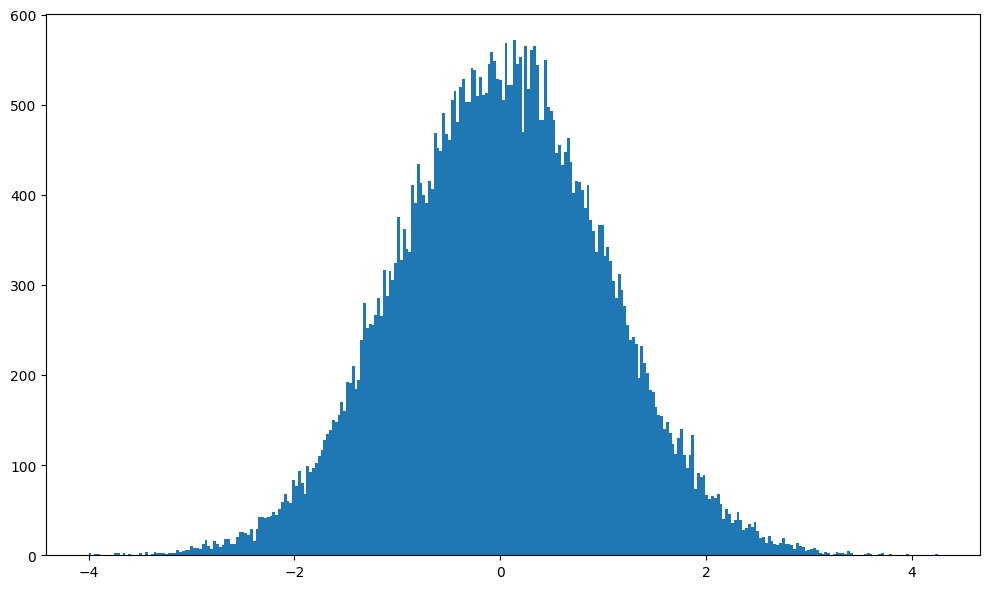

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

वास्तविक जीवन में अधिकांश मान सामान्य रूप से वितरित होते हैं, इसलिए नमूना डेटा उत्पन्न करने के लिए हमें एक समान रैंडम नंबर जनरेटर का उपयोग नहीं करना चाहिए। यदि हम एक समान वितरण (जो `np.random.rand` द्वारा उत्पन्न होता है) के साथ भार उत्पन्न करने का प्रयास करते हैं, तो यह होता है:


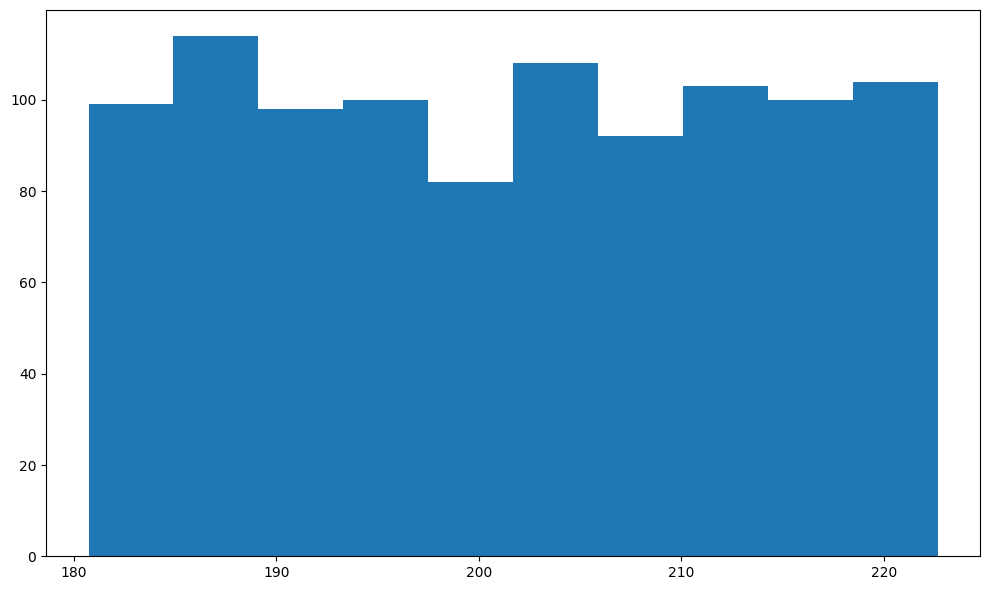

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## विश्वास अंतराल

अब चलिए बेसबॉल खिलाड़ियों के वजन और ऊंचाई के लिए विश्वास अंतराल की गणना करते हैं। हम इस कोड का उपयोग करेंगे [इस StackOverflow चर्चा से](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## परिकल्पना परीक्षण

आइए हमारे बेसबॉल खिलाड़ियों के डेटा सेट में विभिन्न भूमिकाओं का अन्वेषण करें:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


हम देख सकते हैं कि अंतराल एक-दूसरे से ओवरलैप नहीं करते हैं।

परिकल्पना को सिद्ध करने का सांख्यिकीय रूप से अधिक सटीक तरीका **Student t-test** का उपयोग करना है:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` फ़ंक्शन द्वारा लौटाए गए दो मान हैं:
* p-value को इस बात की संभावना के रूप में देखा जा सकता है कि दो वितरणों का औसत समान है। हमारे मामले में, यह बहुत कम है, जिसका मतलब है कि इस बात के लिए मजबूत प्रमाण हैं कि पहले बेसमैन अधिक लंबे होते हैं।
* t-value सामान्यीकृत औसत अंतर का मध्यवर्ती मान है, जिसका उपयोग t-परीक्षण में किया जाता है, और इसे दिए गए आत्मविश्वास मान के लिए एक सीमा मान के साथ तुलना की जाती है।


## केंद्रीय सीमा प्रमेय के साथ सामान्य वितरण का अनुकरण

Python में छद्म-यादृच्छिक जनरेटर हमें एक समान वितरण प्रदान करने के लिए डिज़ाइन किया गया है। यदि हम सामान्य वितरण के लिए एक जनरेटर बनाना चाहते हैं, तो हम केंद्रीय सीमा प्रमेय का उपयोग कर सकते हैं। सामान्य रूप से वितरित मान प्राप्त करने के लिए, हम बस एक समान-जनित नमूने का औसत निकालेंगे।


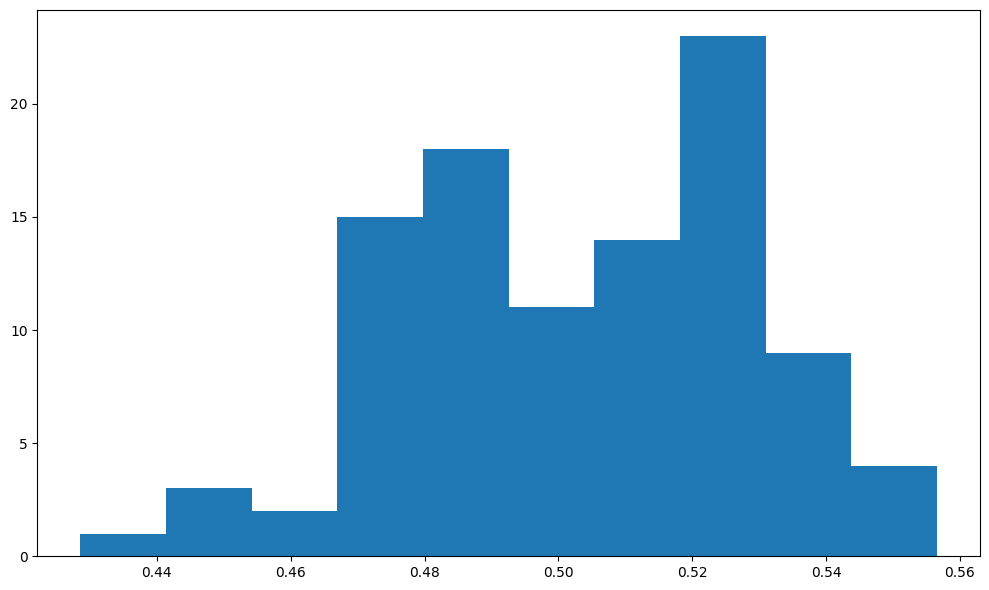

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## सहसंबंध और ईविल बेसबॉल कॉर्प

सहसंबंध हमें डेटा अनुक्रमों के बीच संबंध खोजने की अनुमति देता है। हमारे खिलौना उदाहरण में, मान लें कि एक दुष्ट बेसबॉल निगम है जो अपने खिलाड़ियों को उनकी ऊंचाई के अनुसार भुगतान करता है - खिलाड़ी जितना लंबा होगा, उसे उतना ही अधिक पैसा मिलेगा। मान लें कि $1000 का एक आधार वेतन है, और ऊंचाई के आधार पर $0 से $100 तक का अतिरिक्त बोनस। हम MLB के असली खिलाड़ियों को लेंगे और उनकी काल्पनिक सैलरी की गणना करेंगे:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


आइए अब उन अनुक्रमों का सह-संवेदनशीलता (covariance) और सहसंबंध (correlation) की गणना करें। `np.cov` हमें तथाकथित **सह-संवेदनशीलता मैट्रिक्स** देगा, जो कई चर के लिए सह-संवेदनशीलता का विस्तार है। सह-संवेदनशीलता मैट्रिक्स $M$ का तत्व $M_{ij}$ इनपुट चर $X_i$ और $X_j$ के बीच सहसंबंध है, और विकर्ण मान $M_{ii}$ चर $X_{i}$ का विचलन (variance) है। इसी प्रकार, `np.corrcoef` हमें **सहसंबंध मैट्रिक्स** देगा।


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


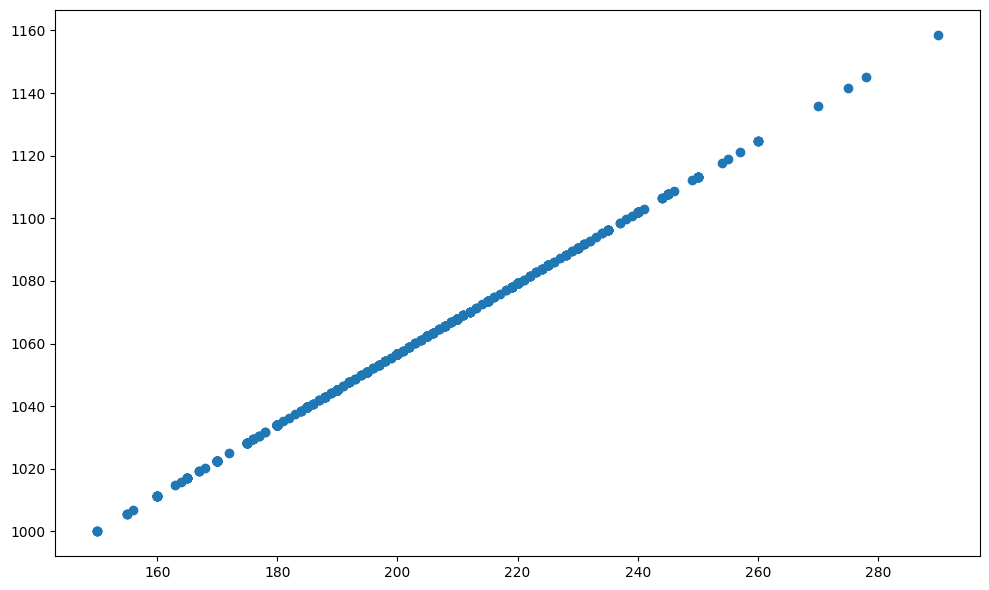

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


इस मामले में, सहसंबंध थोड़ा छोटा है, लेकिन यह अभी भी काफी उच्च है। अब, संबंध को और भी कम स्पष्ट बनाने के लिए, हम वेतन में कुछ यादृच्छिक चर जोड़कर कुछ अतिरिक्त यादृच्छिकता जोड़ना चाह सकते हैं। आइए देखें क्या होता है:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


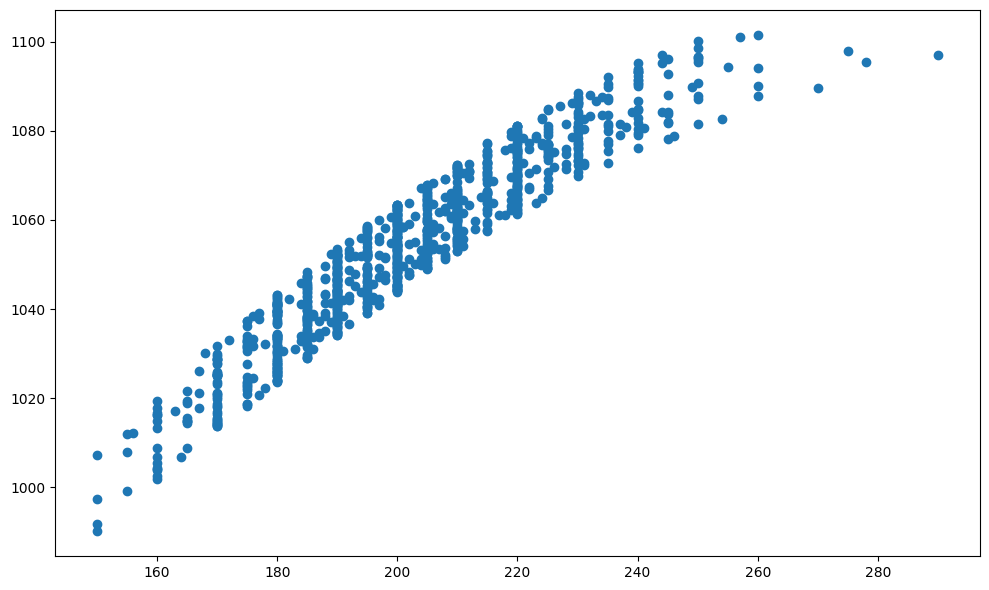

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

क्या आप अंदाज़ा लगा सकते हैं कि बिंदु इस तरह से सीधी रेखाओं में क्यों आते हैं?

हमने एक कृत्रिम रूप से निर्मित अवधारणा, जैसे वेतन, और देखे गए चर *ऊंचाई* के बीच संबंध देखा है। आइए अब देखें कि क्या दो देखे गए चर, जैसे ऊंचाई और वजन, भी आपस में संबंधित हैं:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

दुर्भाग्यवश, हमें कोई परिणाम नहीं मिला - केवल कुछ अजीब `nan` मान प्राप्त हुए। इसका कारण यह है कि हमारी श्रृंखला में कुछ मान अपरिभाषित हैं, जिन्हें `nan` के रूप में दर्शाया गया है, और यह ऑपरेशन का परिणाम भी अपरिभाषित कर देता है। मैट्रिक्स को देखकर हम देख सकते हैं कि `Weight` समस्या वाली कॉलम है, क्योंकि `Height` मानों के बीच आत्म-संबंध की गणना की गई है।

> यह उदाहरण **डेटा तैयारी** और **सफाई** के महत्व को दर्शाता है। बिना सही डेटा के हम कुछ भी गणना नहीं कर सकते।

आइए `fillna` विधि का उपयोग करके गायब मानों को भरें, और संबंध की गणना करें:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

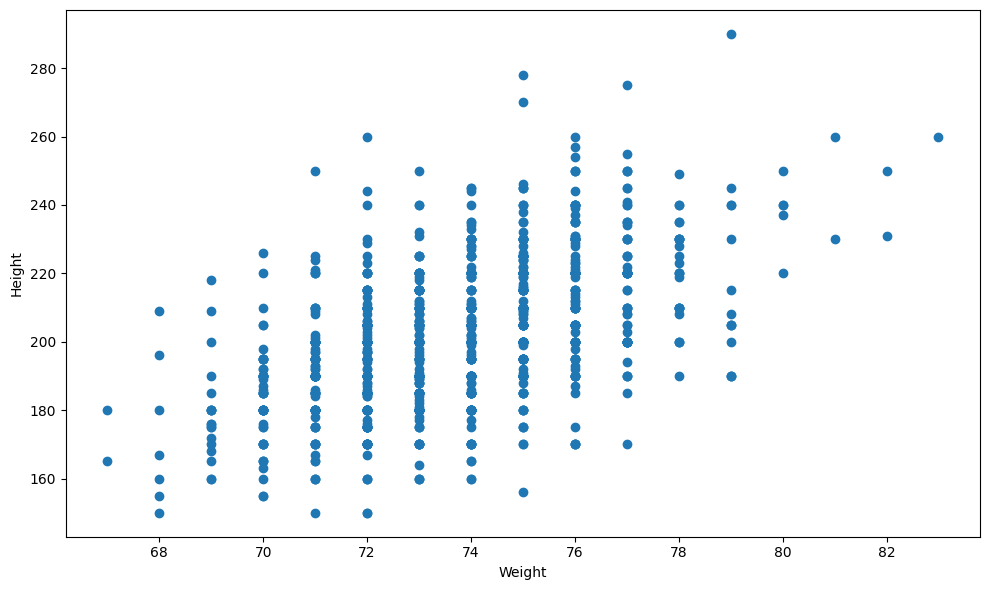

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## निष्कर्ष

इस नोटबुक में हमने डेटा पर बुनियादी संचालन करके सांख्यिकीय कार्यों की गणना करना सीखा। अब हम जानते हैं कि गणित और सांख्यिकी के एक ठोस उपकरण का उपयोग करके कुछ परिकल्पनाओं को सिद्ध कैसे किया जाए, और किसी डेटा सैंपल के आधार पर मनमाने वेरिएबल्स के लिए विश्वास अंतराल (confidence intervals) की गणना कैसे की जाए।



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता के लिए प्रयास करते हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को आधिकारिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।  
